# Prediction Potential Areas For Investment By Analyzing Venues Data And Sales Price Of Houses Sold Data
### Applied Data Science Capstone Project by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## 1. Introduction: Business Problem <a name="introduction"></a>

Turkish metropolitan city Izmir has population of 4.36 million. It makes Izmir the third most populous city in Turkey and the fourth in Mediterranean Sea. Izmir consist of 11 urban districts – namely Balcova, Bayrakli, Bornova, Buca, Cigli, Gaziemir, Guzelbahce, Karabaglar, Karsiyaka, Konak, and Narlidere – and additionally 19 rural districts – namely Aliaga, Bayindir, Bergama, Beydag, Cesme, Dikili, Foca, Karaburun, Kemalpasa, Kinik, Kiraz, Menderes, Menemen, Odemis, Seferihisar, Selcuk, Tire, Torbalı, Urla –.  
  
Izmir has become the most profitable city of Turkey in which house rents increase most recently. Prediction of new areas that may have the potential to appreciate in value is vital for investors or for those who think to buy a new house. I aimed to meet this requirement in this project. Boroughs of Izmir were clustered based on the venues that they have. Then, the clusters were compared with sold house prices to reveal patterns behind house prices.  

## 2. Data <a name="data"></a>
In project four data sources will be used:  
- An open-source API, which is publicly available in GitHub, is used to retrieve longitude and latitude coordinates of the center of boroughs.  
The API includes coordinates of all cities and boroughs in Turkey. The information of Izmir is parsed through URL query.  
- I mentioned above that similar boroughs were clustered by exploiting venues that they have. By using the center coordinates, the most common venues with their features in neighborhoods are retrieved from Foursquare API through URL query.  
- The average sales price of houses sold in Izmir are taken from Endeksa that is one of the most popular property price index companies in Turkey.  
- The geolocation data of polygons that draw the boundary of boroughs of Izmir are retrieved from Second-level Administrative Divisions of the Turkey from Spatial Data Repository of NYU. The data contains the geolocation of whole cities and boroughs in Turkey. The data of Izmir was parsed from all geojson files. It will be used to create choropleth map.

## 3. Methodology <a name="methodology"></a> 
The idea behind of this project to cluster boroughs based on venues that they have. Then, compare clusters with the average sales price of houses sold. 

Firstly, I retrieve longitude and latitude coordinates of the center of boroughs. 

In [1]:
#Importing Libraries
import numpy as np 
import pandas as pd 

In [2]:
import requests # library to handle requests
#query for cities in Turkey
url= "https://il-ilce-rest-api.herokuapp.com/v1/cities?fields=name,towns"
results = requests.get(url).json()

In [3]:
results.keys()

dict_keys(['status', 'data'])

The data contains geolocation of whole Turkey. 17. index belongs Izmir. Let notes ID of Izmir:
'41585da49f8b3330c12e64b11b0195b4'

In [4]:
results['data'][17]

{'_id': '41585da49f8b3330c12e64b11b0195b4',
 'name': 'İzmir',
 'towns': [{'_id': '65dc2e68b5eb637e49ce0ee74dc85bf9', 'name': 'Aliağa'},
  {'_id': '7e67d0f80beb7f5f1b2b9ffd9dbd32c0', 'name': 'Balçova'},
  {'_id': '3cdefd8c4b4b47284d803c945df6ca8f', 'name': 'Bayındır'},
  {'_id': 'cb9a978ae8bad904289aaf61285ebb91', 'name': 'Bayraklı'},
  {'_id': '7a4d56bfe5a4d8ea9cf3ffd5c9762b5d', 'name': 'Bergama'},
  {'_id': 'e24b2916005d1b1dea1c28541b0e3a25', 'name': 'Beydağ'},
  {'_id': '7dc572604e2139f8c9f1726a36c249b5', 'name': 'Bornova'},
  {'_id': '3e459a1b130812030a3da21684d89ec5', 'name': 'Buca'},
  {'_id': '6f0282c38c7852e80470a01e325c9a27', 'name': 'Çeşme'},
  {'_id': '19b82bd9c72cc8372bd80fa86f4669bb', 'name': 'Çiğli'},
  {'_id': '8909dd1e0b5d46ecba6301e4cbfd8219', 'name': 'Dikili'},
  {'_id': 'ef346ad273761db3b918b36298e12430', 'name': 'Foça'},
  {'_id': '81f5d8c36c080ef8f8c677c76664e201', 'name': 'Gaziemir'},
  {'_id': 'ed4b39fbf0daefa471f705f8ace231cf', 'name': 'Güzelbahçe'},
  {'_id': 'f

To retrieve coordinates borough of Izmir, we need a new query that is constructed specially for Izmir by using ID of Izmir.

In [5]:
#query for borough in Izmir
url2= "https://il-ilce-rest-api.herokuapp.com/v1/cities/41585da49f8b3330c12e64b11b0195b4/towns?fields=name,geolocation.lat,geolocation.lon"
results2 = requests.get(url2).json()

In [6]:
results2['data'][0]

{'_id': '0e9c0e762ebb2fcb9aac9f08693120a4',
 'name': 'Seferihisar',
 'geolocation': {'lat': '38.16895815', 'lon': '26.8944538865725'}}

In [7]:
#initialize new dataframe
column_names = ['Borough','Latitude','Longitude']
df = pd.DataFrame(columns=column_names)
df

,Borough,Latitude,Longitude


In [8]:
for i in range(0,len(results2['data'])):
    df.loc[i,'Borough']=results2['data'][i]['name']
    df.loc[i,'Latitude']=results2['data'][i]['geolocation']['lat']
    df.loc[i,'Longitude']=results2['data'][i]['geolocation']['lon']

In [9]:
#Replace Turkish characters with english ones
df = df.replace('ğ','g', regex=True)
df = df.replace('ç','c', regex=True)
df = df.replace('ş','s', regex=True)
df = df.replace('ı','i', regex=True)
df = df.replace('ü','u', regex=True)
df = df.replace('ö','o', regex=True)
df = df.replace('Ö','O', regex=True)
df = df.replace('Ç','C', regex=True)
df = df.replace('Ş','S', regex=True)
df = df.replace('İ','I', regex=True)
df = df.replace('Ü','U', regex=True)

Our data that will be used to retrieve values from Foursquare API is shown belown.

In [10]:
df

,Borough,Latitude,Longitude
0,Seferihisar,38.16895815,26.8944538865725
1,Menemen,38.6283728,27.0888358553506
2,Cigli,38.48552305,26.9961892398355
3,Kiraz,38.24526905,28.3086828585528
4,Kemalpasa,38.42960135,27.5036844114972
5,Bayindir,38.2437139,27.6583132705963
6,Buca,38.3385885,27.2433177453994
7,Odemis,38.1951764,27.9941612668683
8,Karaburun,38.5578488,26.4711475429503
9,Karsiyaka,38.50309975,27.1287548023457


In [11]:
#library to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
# map rendering library
import folium 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

address = 'İzmir, Turkey'
#convert string adress into geographical coordinates 
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude 
longitude = location.longitude 

# create map of Izmir using latitude and longitude values
map_Izmir = folium.Map(location=[latitude, longitude], zoom_start=8)

# add markers to map bu using manhattan_data dataframe
for lat, lng, label in zip(df['Latitude'], df['Longitude'],df['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Izmir)  
    
map_Izmir

Let retrieve most common venues in boroughs. Radius is chosen as 10 km because of many wide rural areas. The limit of the number of venues returned by Foursquare API is decided as 200 so as to avoid overlapping of urban boroughs.

In [12]:
#Define Foursquare Credentials and Version
CLIENT_ID = 'FZOE1TTDZP0PIJGJ2OUWZBW2YJDNU52E0BSYRSOM1IZWHWFL' # your Foursquare ID
CLIENT_SECRET = 'XRZS4UPS4SHJSKREH0U5AGW1DQSNZLGUU024FQIUMC21C1JD' # your Foursquare Secret
VERSION = '20190203'
LIMIT = 200 # limit of number of venues returned by Foursquare API

In [13]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#The function to get the top 100 venues that are in the input neighborhoods within a radius of imput value meters.
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
#run the above function on each neighborhood and create a new dataframe called venues_df.
venues_df = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude'],
                            radius=10000
                                  )

Seferihisar
Menemen
Cigli
Kiraz
Kemalpasa
Bayindir
Buca
Odemis
Karaburun
Karsiyaka
Aliaga
Kinik
Cesme
Selcuk
Bergama
Bornova
Torbali
Balcova
Gaziemir
Menderes
Dikili
Bayrakli
Beydag
Tire
Guzelbahce
Foca
Urla
Konak
Karabaglar
Narlidere


In [15]:
#Those values can be used to tune radious
#10000 200 7
print(venues_df.shape)
print('There are {} uniques categories.'.format(len(venues_df['Venue Category'].unique())))
venues_df.head()

(2752, 7)
There are 252 uniques categories.


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Seferihisar,38.16895815,26.8944538865725,Kecheese Süt Ürünleri,38.181663,26.858899,Dairy Store
1,Seferihisar,38.16895815,26.8944538865725,Kavakdere,38.124908,26.907399,Vineyard
2,Seferihisar,38.16895815,26.8944538865725,Şah Mekan,38.196751,26.844920,Café
3,Seferihisar,38.16895815,26.8944538865725,Seferihisar Pazar Yeri,38.196754,26.840374,Farmers Market
4,Seferihisar,38.16895815,26.8944538865725,Ün AVM,38.195887,26.840034,Furniture / Home Store


In [16]:
# Function sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [17]:
# apply one hot encoding over categories, transform result into a dataframe
venues_onehot = pd.get_dummies(venues_df[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column into to new dataframe
venues_onehot['Borough'] = venues_df['Borough'] 

# move neighborhood column to the first column
fixed_columns = [venues_onehot.columns[-1]] + list(venues_onehot.columns[:-1])
venues_onehot = venues_onehot[fixed_columns]

#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
venues_grouped = venues_onehot.groupby('Borough').mean().reset_index()
venues_grouped.shape

(30, 253)

I drop Café, Breakfast Spot, Turkish Restaurant, Restaurant and Turkish restaurants because they are not discriminative features.

In [18]:
print(venues_grouped.shape)
venues_grouped.drop(['Café'], axis = 1, inplace = True)
venues_grouped.drop(['Breakfast Spot'], axis = 1, inplace = True)
venues_grouped.drop(['Turkish Restaurant'], axis = 1, inplace = True)
venues_grouped.drop(['Restaurant'], axis = 1, inplace = True)
print(venues_grouped.shape)

(30, 253)
(30, 249)


In [19]:
#create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = venues_grouped['Borough']

for ind in np.arange(venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aliaga,Seafood Restaurant,Beach,Bakery,Fast Food Restaurant,Gym / Fitness Center,Beer Garden,Hotel,Waterfront,Steakhouse,Burger Joint
1,Balcova,Coffee Shop,Theater,Hotel,Waterfront,Art Gallery,Seafood Restaurant,Chocolate Shop,Historic Site,Pastry Shop,Bakery
2,Bayindir,Diner,Mountain,Tea Room,Flower Shop,Botanical Garden,Food Court,Garden,Turkish Coffeehouse,Pizza Place,Dive Bar
3,Bayrakli,Coffee Shop,Meyhane,Gym / Fitness Center,Pastry Shop,Art Gallery,Chocolate Shop,Seafood Restaurant,Dessert Shop,Dance Studio,Performing Arts Venue
4,Bergama,Historic Site,Hotel,Bar,Lounge,Arcade,Turkish Home Cooking Restaurant,History Museum,Dessert Shop,Snack Place,Soccer Field
5,Beydag,Mountain,Steakhouse,Park,Convenience Store,Pharmacy,Tea Room,Farm,Lake,Turkish Coffeehouse,Plaza
6,Bornova,Coffee Shop,Dessert Shop,Gym / Fitness Center,Clothing Store,Pastry Shop,Brewery,Bar,Salon / Barbershop,Bakery,Burger Joint
7,Buca,Gym / Fitness Center,Bakery,Coffee Shop,Gym,Hookah Bar,Pub,Fast Food Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,Bar
8,Cesme,Hotel,Beach,Bed & Breakfast,Lounge,Bar,Motel,Surf Spot,Seafood Restaurant,Farmers Market,Bakery
9,Cigli,Gym / Fitness Center,Coffee Shop,Waterfront,Clothing Store,Scenic Lookout,Supermarket,Shopping Mall,Bakery,Bookstore,Basketball Stadium


Let use Elbow Method to choose optimum cluster number k.

Text(0, 0.5, 'WCSS')

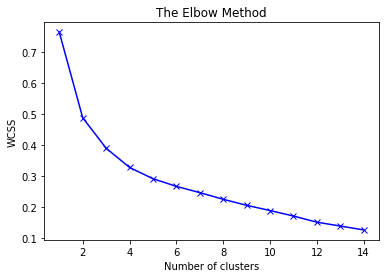

In [21]:
### Clustering ###
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

wcss = []
for i in range(1, 15):
    venues_grouped_clustering = venues_grouped.drop('Borough', 1)
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=30000, n_init=15, random_state = 0)
    kmeans.fit(venues_grouped_clustering)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [22]:
# set number of clusters
kclusters = 5
#drop the neighborhood name for clustering algorithm
venues_grouped_clustering = venues_grouped.drop('Borough', 1)
# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', max_iter=3000, n_init=15, random_state = 0)
kmeans.fit(venues_grouped_clustering)


### merge labels, sorting data frame and geo-locations ###
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#the data with coordinates and neighborhood name that we obtain above
ultimate_df = df
# merge two data frame manhattan_merged and neighborhoods_venues_sorted
ultimate_df = ultimate_df.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')


In [23]:
#read house price dataframe
hp_df = pd.read_csv("houseprice.csv",sep=';')
hp_df=hp_df.rename(columns={"Average Sales Price of Houses Sold (TL/m2)": "Price"})
hp_df

,Borough,Price
0,Foca,3893
1,Cesme,8138
2,Guzelbahce,5222
3,Karsiyaka,3552
4,Narlidere,5130
5,Urla,5033
6,Bornova,3564
7,Balcova,3383
8,Seferihisar,2954
9,Bayrakli,3445


<b> Create a map </b>  
Let's create map by using average sales price of houses sold data, and by using izmirgeojson data for boundaries

In [24]:
#library to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
# map rendering library
import folium 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

address = 'İzmir, Turkey'
#convert string adress into geographical coordinates 
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude 
longitude = location.longitude 


#improt geojson data which contains
izmir_geo = r'izmirgeojson.json'
# create map 
izmir_map = folium.Map(location=[latitude, longitude], zoom_start=8)
                          
izmir_map.choropleth(
    geo_data=izmir_geo,
    data=hp_df,
    columns=['Borough','Price'],
    key_on='feature.properties.name_2',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='House Sales Price in Izmir',
    highlight=True
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ultimate_df['Latitude'],ultimate_df['Longitude'], ultimate_df['Borough'], ultimate_df['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(izmir_map)
       
izmir_map

C:\Users\Legion\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## 4. Analysis <a name="analysis"></a>
Before the start analysis correlation between price and clusters, we must look in more detailed vanues of clusters to understand characteristics of clusters.

Cluster 0 is indicated with a red label on map. When you look at the map, you can easily see that those boroughs with red labels are countryside rural areas. Also, most ten common venues of those borough support this results. The list of the cluster is dominated by Parks, Forests, Mountains, Farms.

In [403]:
ultimate_df.loc[ultimate_df['Cluster Labels'] == 0, ultimate_df.columns[[0] + list(range(4, ultimate_df.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Kiraz,Park,Seafood Restaurant,Mountain,Boarding House,Snack Place,Beach Bar,Fish & Chips Shop,Fast Food Restaurant,Pharmacy,Farmers Market
4,Kemalpasa,BBQ Joint,Park,Bakery,Forest,Pizza Place,Dessert Shop,Mountain,Kebab Restaurant,Steakhouse,Shopping Mall
5,Bayindir,Diner,Mountain,Tea Room,Flower Shop,Botanical Garden,Food Court,Garden,Turkish Coffeehouse,Pizza Place,Dive Bar
7,Odemis,Bakery,Dessert Shop,Kebab Restaurant,Sandwich Place,Gym / Fitness Center,Steakhouse,Clothing Store,Middle Eastern Restaurant,Tea Room,History Museum
11,Kinik,Botanical Garden,Plaza,Buffet,Forest,Bar,Pizza Place,Pide Place,Beach,Comfort Food Restaurant,Beer Garden
19,Menderes,Steakhouse,Arcade,Bakery,BBQ Joint,Forest,Trail,Athletics & Sports,Buffet,Farm,Diner
22,Beydag,Mountain,Steakhouse,Park,Convenience Store,Pharmacy,Tea Room,Farm,Lake,Turkish Coffeehouse,Plaza
23,Tire,Dessert Shop,Pizza Place,Snack Place,Historic Site,Clothing Store,Pub,Mountain,Sandwich Place,Arcade,Gym / Fitness Center


Cluster 1 is indicated with a purple label on map. The venue list of the borough belonging to this cluster is dominated by Hotels and Historic sites. As I mentioned in the introduction, many tourists come to Izmir to visit Selcuk and Bergama every year. There are Ephesus Ancient City and House of Virgin Mary in Selcuk, and there is Pergamon Ancient City in Bergama. Foca is also appealing to tourists with its beaches and antic heritages.

In [404]:
ultimate_df.loc[ultimate_df['Cluster Labels'] == 1, ultimate_df.columns[[0] + list(range(4, ultimate_df.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Selcuk,Hotel,Historic Site,Coffee Shop,Bed & Breakfast,Steakhouse,Wine Shop,Fast Food Restaurant,Bar,Gym,Park
14,Bergama,Historic Site,Hotel,Bar,Lounge,Arcade,Turkish Home Cooking Restaurant,History Museum,Dessert Shop,Snack Place,Soccer Field
25,Foca,Hotel,Seafood Restaurant,Bed & Breakfast,Steakhouse,Bar,Beach,Historic Site,Pide Place,Harbor / Marina,Resort


Cluster 2 is indicated with a blue label on map. This cluster consists of urban areas of Izmir. The boroughs in these clusters include a great number of coffee shops, sports, and art facilities. Industry zones of Izmir are built in those boroughs and the workforce of Izmir's Industry lives in those areas. 

In [405]:
ultimate_df.loc[ultimate_df['Cluster Labels'] == 2, ultimate_df.columns[[0] + list(range(4, ultimate_df.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Menemen,Coffee Shop,Gym,Gym / Fitness Center,Steakhouse,Kofte Place,Kokoreç Restaurant,Tea Room,Accessories Store,Bakery,Food Truck
2,Cigli,Gym / Fitness Center,Coffee Shop,Waterfront,Clothing Store,Scenic Lookout,Supermarket,Shopping Mall,Bakery,Bookstore,Basketball Stadium
6,Buca,Gym / Fitness Center,Bakery,Coffee Shop,Gym,Hookah Bar,Pub,Fast Food Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,Bar
9,Karsiyaka,Coffee Shop,Gym / Fitness Center,Bookstore,Waterfront,Bar,Bakery,Scenic Lookout,Meyhane,Manti Place,Motorcycle Shop
10,Aliaga,Seafood Restaurant,Beach,Bakery,Fast Food Restaurant,Gym / Fitness Center,Beer Garden,Hotel,Waterfront,Steakhouse,Burger Joint
15,Bornova,Coffee Shop,Dessert Shop,Gym / Fitness Center,Clothing Store,Pastry Shop,Brewery,Bar,Salon / Barbershop,Bakery,Burger Joint
16,Torbali,Coffee Shop,Steakhouse,Gym,Diner,Hookah Bar,Beer Garden,Bar,Clothing Store,Plaza,Art Gallery
17,Balcova,Coffee Shop,Theater,Hotel,Waterfront,Art Gallery,Seafood Restaurant,Chocolate Shop,Historic Site,Pastry Shop,Bakery
18,Gaziemir,Gym / Fitness Center,Coffee Shop,Hotel,Arcade,Bar,Kebab Restaurant,Bakery,Dessert Shop,Sandwich Place,Baby Store
21,Bayrakli,Coffee Shop,Meyhane,Gym / Fitness Center,Pastry Shop,Art Gallery,Chocolate Shop,Seafood Restaurant,Dessert Shop,Dance Studio,Performing Arts Venue


Cluster 3 is indicated with a green label on the map. There are popular coastal holiday towns of Izmir in this cluster. Those boroughs which are intertwined with nature and sea includes any number of bars, beaches, hotels as well as farms, mountains in their lists.

In [406]:
ultimate_df.loc[ultimate_df['Cluster Labels'] == 3, ultimate_df.columns[[0] + list(range(4, ultimate_df.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Seferihisar,Beach,Bed & Breakfast,Seafood Restaurant,Hotel,Historic Site,Coffee Shop,Grocery Store,Furniture / Home Store,Lounge,Turkish Home Cooking Restaurant
8,Karaburun,Beach,Mountain,Other Great Outdoors,Scenic Lookout,Farm,Tea Room,Harbor / Marina,Bakery,Coffee Shop,Plaza
20,Dikili,Beach,Bar,Diner,Seafood Restaurant,Coffee Shop,Fast Food Restaurant,Pide Place,Music Venue,Farm,Plaza
26,Urla,Beach,Surf Spot,Hotel,Plaza,Farm,Campground,Tea Room,Pool,Scenic Lookout,Bar


According to one of Turkey's most famous estate web-site, Cesme is the fifth most expensive district of Turkey. There are villas of the richest men of Turkey and ultra-luxury hotels. So, it's the outlier instance in our data. It's not surprising that cluster 4 contains only Cesme. 

In [407]:
ultimate_df.loc[ultimate_df['Cluster Labels'] == 4, ultimate_df.columns[[0] + list(range(4, ultimate_df.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Cesme,Hotel,Beach,Bed & Breakfast,Lounge,Bar,Motel,Surf Spot,Seafood Restaurant,Farmers Market,Bakery


## 5. Results and Discussion <a name="results"></a>

My project aims to obtain a correlation between borough clusters and house selling prices. And, my ultimate goal is to predict potential boroughs to invest by using this correlation. Before the discuss our results, I analyzed the correlation between clusters and prices by visualizing to reveals results more clear. To do so, I divided the price into 5 levels first. I should note that Cesme is an outlier instance due to its extremely high average house sold price. So that, I dropped Cesme first, and then add it with level-5. I merge cluster labels, price and price level into one data frame. I consider cluster labels and price levels as independent categorical attributes and consider prices as dependent value. While cluster labels are drawing as one categorical attribute by scattering against dependent continuous price value, price level that is another categorical attribute is combined as a color with this plot. 

In [421]:
#Backup for cesme
cesme=hp_df[((hp_df.Borough == 'Cesme'))]
#Drop Cesme
i = hp_df[((hp_df.Borough == 'Cesme'))].index
hp_df.drop(hp_df.index[i],axis = 0, inplace = True)

In [422]:
#intervals for price levels
bins = np.linspace(hp_df['Price'].min(), hp_df['Price'].max(),5)
bins

array([1519.  , 2444.75, 3370.5 , 4296.25, 5222.  ])

In [423]:
levels = ['level-1','level-2','level-3','level-4']

In [424]:
#assign this levels into new column of house price dataframe
hp_df['Price Levels'] = pd.cut(hp_df['Price'], bins, labels = levels, include_lowest = True)

In [425]:
#add cluster labels into this dataframe
#add again cesme
hp_df=hp_df.append(cesme, sort='True')
hp_df.reset_index()
#assign level-5 to cesme
hp_df.loc[hp_df['Borough'] == 'Cesme', ['Price Levels']] = 'level-5'
hp_df=hp_df.sort_index()
hp_df

,Borough,Price,Price Levels
0,Foca,3893,level-3
1,Cesme,8138,level-5
2,Guzelbahce,5222,level-4
3,Karsiyaka,3552,level-3
4,Narlidere,5130,level-4
5,Urla,5033,level-4
6,Bornova,3564,level-3
7,Balcova,3383,level-3
8,Seferihisar,2954,level-2
9,Bayrakli,3445,level-3


In [426]:
#Add class label to data
cluslabels_df=neighborhoods_venues_sorted[['Cluster Labels','Borough']]
cluslabels_df = cluslabels_df.join(hp_df.set_index('Borough'), on='Borough')

In [416]:
cluslabels_df.loc[cluslabels_df['Cluster Labels'] == 0]

,Cluster Labels,Borough,Price,Price Levels
2,0,Bayindir,1795,level-1
5,0,Beydag,1519,level-1
17,0,Kemalpasa,2153,level-1
18,0,Kinik,1568,level-1
19,0,Kiraz,1707,level-1
21,0,Menderes,3021,level-2
24,0,Odemis,1666,level-1
27,0,Tire,2091,level-1


In [417]:
cluslabels_df.loc[cluslabels_df['Cluster Labels'] == 1]

,Cluster Labels,Borough,Price,Price Levels
4,1,Bergama,1821,level-1
11,1,Foca,3893,level-3
26,1,Selcuk,2303,level-1


In [418]:
cluslabels_df.loc[cluslabels_df['Cluster Labels'] == 2]

,Cluster Labels,Borough,Price,Price Levels
0,2,Aliaga,2311,level-1
1,2,Balcova,3383,level-3
3,2,Bayrakli,3445,level-3
6,2,Bornova,3564,level-3
7,2,Buca,2560,level-2
9,2,Cigli,2520,level-2
12,2,Gaziemir,3357,level-2
13,2,Guzelbahce,5222,level-4
14,2,Karabaglar,2400,level-1
16,2,Karsiyaka,3552,level-3


In [419]:
cluslabels_df.loc[cluslabels_df['Cluster Labels'] == 3]

,Cluster Labels,Borough,Price,Price Levels
10,3,Dikili,2995,level-2
15,3,Karaburun,3714,level-3
25,3,Seferihisar,2954,level-2
29,3,Urla,5033,level-4


In [420]:
cluslabels_df.loc[cluslabels_df['Cluster Labels'] == 4]

,Cluster Labels,Borough,Price,Price Levels
8,4,Cesme,8138,level-5


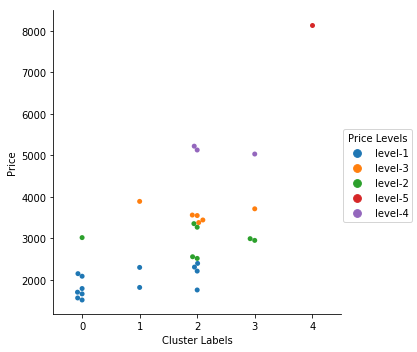

In [414]:
import seaborn as sns
sns.factorplot(x="Cluster Labels", y="Price", hue="Price Levels", kind="swarm",size=5, aspect=1, data=cluslabels_df)

Correlation between class labels that are constructed by k-means algorithm and price level can be seen easily above the plot. It's obvious that investment in cluster 0 which consists of rural boroughs won't be a good idea. Selcuk and Bergama in Cluster 1 can be a great opportunity for investment. Although they are very similar to Foca, the prices in these boroughs are far cheaper than Foca. I should emphasize that those two boroughs have beach although not as popular as Foca. Those beaches may be appreciated in value in the near future. Cluster-2 require more discriminative feature because of their complex structure. But if we remove expensive and cheap outliers, we can see that Aliaga, Cigli, Buca may be a profitable investment for the future. Because they are cheaper than other boroughs in the cluster. Maybe Cluster 3 contains the boroughs which have the most potential. Urla is one of the most valuable boroughs not only of Izmir but in Turkey. However, Karaburun, Dikili, and Seferhisar are affordable despite their similarity to Urla. They can be considered for real estate projects.

## 6. Conclusion <a name="conclusion"></a>
In this project, I demonstrated a method to predict the best areas for investors or for those who think to buy a new home. In this method, boroughs were clustered by k-means algorithm based on venues that they have. Then, cluster labels were compared to house-prices. By analyzing both data, one can recommend the areas may have the potential to invest. This method can be developed by contributing other data sets into venues. Because many factors can affect boroughs similarity. Especially, urban boroughs need more features to be distinguished. Thereby, more accurate results can be obtained.